In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# **INTRODUCTION**
##### This notebook provides a comprehensive analysis of the European motorbike market, using data from a CSV file titled europe-motorbikes-zenrows.csv. The analysis is conducted through several key stages:
##### *Data Loading and Exploration*: The dataset is first loaded and examined to understand its structure, types, and basic statistics. This includes reviewing column names, data types, and summary statistics to identify any missing or unusual values that may need further cleaning.
##### *Data Cleaning and Preprocessing*: Involve handling missing values, correcting data types, and potentially transforming features to prepare for in-depth analysis.
##### *Exploratory Data Analysis (EDA)*:  Visualizations and statistical summaries, the notebook explores relationships within the data. Techniques such as histograms, scatter plots, and correlation are often used to identify trends and patterns in motorbike sales or usage.
##### *Advanced Analysis and Insights*: Depending on the dataset and the project's goal, further analysis may involve segmenting motorbike types, identifying seasonal trends, or pinpointing geographic trends in the European market.

In [2]:
df = pd.read_csv('europe-motorbikes-zenrows.csv')
df

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
...,...,...,...,...,...,...,...,...,...,...
34912,17300,10592,125.0,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...
34913,8500,29000,54.0,Harley-Davidson Iron 883,05/2004,Gasoline,NaN,Used,NaN,/offers/harley-davidson-iron-883-gasoline-blac...
34914,11990,39140,160.0,BMW S 1000 XR,06/2015,NaN,Manual,Used,ABS,/offers/bmw-s-1000-xr-abs-white-6dac336b-e49b-...
34915,8350,11500,56.0,Triumph Bonneville T100,05/2018,Gasoline,Manual,Used,Black mit Garantie,/offers/triumph-bonneville-t100-black-mit-gara...


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.describe()

,price,mileage,power
count,3.491700e+04,3.491700e+04,28598.000000
mean,4.568532e+04,2.183175e+04,206.157598
std,4.850120e+06,2.059421e+05,9371.426466
min,1.000000e+00,0.000000e+00,1.000000
25%,6.999000e+03,2.932000e+03,50.000000
50%,9.920000e+03,1.100000e+04,90.000000
75%,1.259000e+04,2.500000e+04,125.000000
max,8.888889e+08,9.999999e+06,913595.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [6]:
df.isnull().sum()

price             0
mileage           0
power          6319
make_model        0
date              0
fuel           3190
gear          22070
offer_type        0
version       17504
link              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7155 entries, 0 to 34915
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7155 non-null   int64  
 1   mileage     7155 non-null   int64  
 2   power       7155 non-null   float64
 3   make_model  7155 non-null   object 
 4   date        7155 non-null   object 
 5   fuel        7155 non-null   object 
 6   gear        7155 non-null   object 
 7   offer_type  7155 non-null   object 
 8   version     7155 non-null   object 
 9   link        7155 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 614.9+ KB


In [9]:
df.isnull().sum()

price         0
mileage       0
power         0
make_model    0
date          0
fuel          0
gear          0
offer_type    0
version       0
link          0
dtype: int64

In [10]:
print(f'No:of duplicates: {df.duplicated().sum()}')

No:of duplicates: 1060


In [11]:
# remove duplicated
df.drop_duplicates()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
12,18000,700,41.0,Ural Ranger,03/2021,Gasoline,Manual,Used,Euro4 2WD,/offers/ural-ranger-euro4-2wd-gasoline-black-c...
14,10000,80000,125.0,Harley-Davidson Night Rod,09/2010,Gasoline,Manual,Used,Night rod special,/offers/harley-davidson-night-rod-night-rod-sp...
17,12500,18000,82.0,Harley-Davidson Road King,02/1996,Gasoline,Manual,Used,FLHR Road King,/offers/harley-davidson-road-king-flhr-road-ki...
22,10950,10551,185.0,Suzuki,05/2015,Gasoline,Manual,Used,"Sport GSX R 1000, ABS, Complete titanium Yoshi...",/offers/suzuki-others-sport-gsx-r-1000-abs-com...
...,...,...,...,...,...,...,...,...,...,...
34879,16850,38000,64.0,Harley-Davidson,07/2005,Gasoline,Manual,Used,1450 Heritage Softail Bobber Old Style fs2 gsbblo,/offers/harley-davidson-others-1450-heritage-s...
34895,1350,4200,10.0,Daelim Delfino 125,03/2012,Gasoline,Automatic,Used,SU125E SERVICEHEFT GEPFLEGT,/offers/daelim-delfino-125-su125e-serviceheft-...
34897,8990,22800,97.0,Triumph Thruxton,07/2016,Gasoline,Manual,Used,Triumph Thruxton,/offers/triumph-thruxton-triumph-thruxton-gaso...
34912,17300,10592,125.0,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...


In [12]:
# To drop unwanted columns
df.drop(columns=['link'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7155 entries, 0 to 34915
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7155 non-null   int64  
 1   mileage     7155 non-null   int64  
 2   power       7155 non-null   float64
 3   make_model  7155 non-null   object 
 4   date        7155 non-null   object 
 5   fuel        7155 non-null   object 
 6   gear        7155 non-null   object 
 7   offer_type  7155 non-null   object 
 8   version     7155 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 559.0+ KB


In [14]:
df.to_csv('clean_bike.csv')

In [15]:
data = pd.read_csv('clean_bike.csv')

# To drop unwanted index column
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.to_string())

          price  mileage    power                             make_model                    date                 fuel            gear         offer_type                                             version
0         23990      150    218.0                                  Honda                 03/2020             Gasoline          Manual      Demonstration                            CBR1000RR-R Fireblade SP
1         18000      700     41.0                            Ural Ranger                 03/2021             Gasoline          Manual               Used                                           Euro4 2WD
2         10000    80000    125.0              Harley-Davidson Night Rod                 09/2010             Gasoline          Manual               Used                                   Night rod special
3         12500    18000     82.0              Harley-Davidson Road King                 02/1996             Gasoline          Manual               Used                            

In [16]:
# To change the data type of date from object to datatime
data['date'] = pd.to_datetime(data['date'], format='%m/%Y', errors='coerce')

# Format the date to display month first, then year
data['date'] = data['date'].dt.to_period('M')

# Print date columns
print(data['date'].head())

0    2020-03
1    2021-03
2    2010-09
3    1996-02
4    2015-05
Name: date, dtype: period[M]


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   price       7155 non-null   int64    
 1   mileage     7155 non-null   int64    
 2   power       7155 non-null   float64  
 3   make_model  7155 non-null   object   
 4   date        7131 non-null   period[M]
 5   fuel        7155 non-null   object   
 6   gear        7155 non-null   object   
 7   offer_type  7155 non-null   object   
 8   version     7155 non-null   object   
dtypes: float64(1), int64(2), object(5), period[M](1)
memory usage: 503.2+ KB


## 1. What is the relationship between the price and mileage of bikes?

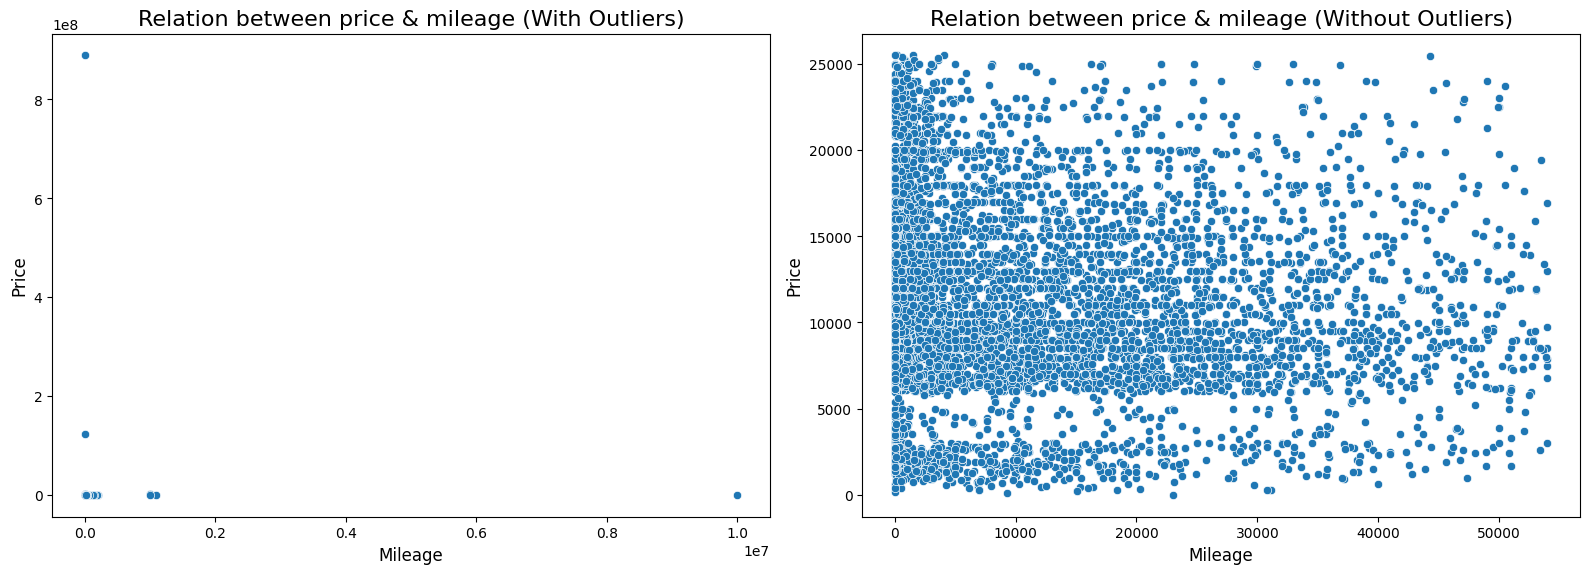

In [18]:
# Considering the price & milage columns from the data
df_bike = data[['price', 'mileage']]

# Remove outliers based on IQR for both price and mileage
Q1 = df_bike[['price', 'mileage']].quantile(0.25)
Q3 = df_bike[['price', 'mileage']].quantile(0.75)
IQR = Q3 - Q1

# Define the filtering condition to remove outliers
condition = ~((df_bike < (Q1 - 1.5 * IQR)) | (df_bike > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered = df_bike[condition]

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot with outliers
sns.scatterplot(x='mileage', y='price', data=df_bike, ax=axes[0])
axes[0].set_title('Relation between price & mileage (With Outliers)', fontsize=16)
axes[0].set_xlabel('Mileage', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)

# Plot without outliers
sns.scatterplot(x='mileage', y='price', data=df_filtered, ax=axes[1])
axes[1].set_title('Relation between price & mileage (Without Outliers)', fontsize=16)
axes[1].set_xlabel('Mileage', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)

# Display the plots side by side
plt.tight_layout()
plt.show()


##### **REPORT:-**
##### There doesn't appear to be a strong linear relationship between price and mileage. Both high and low-priced bikes are spread across different mileage ranges, suggesting that factors other than mileage (e.g., brand, model, year, condition) could play a more significant role in determining the price of bikes.
##### The outliers (on the left) make the data hard to interpret. Once these outliers are removed, the right plot gives a clearer view of the distribution and shows that most of the data is concentrated within more reasonable ranges.


## 2. Relation between power and mileage?

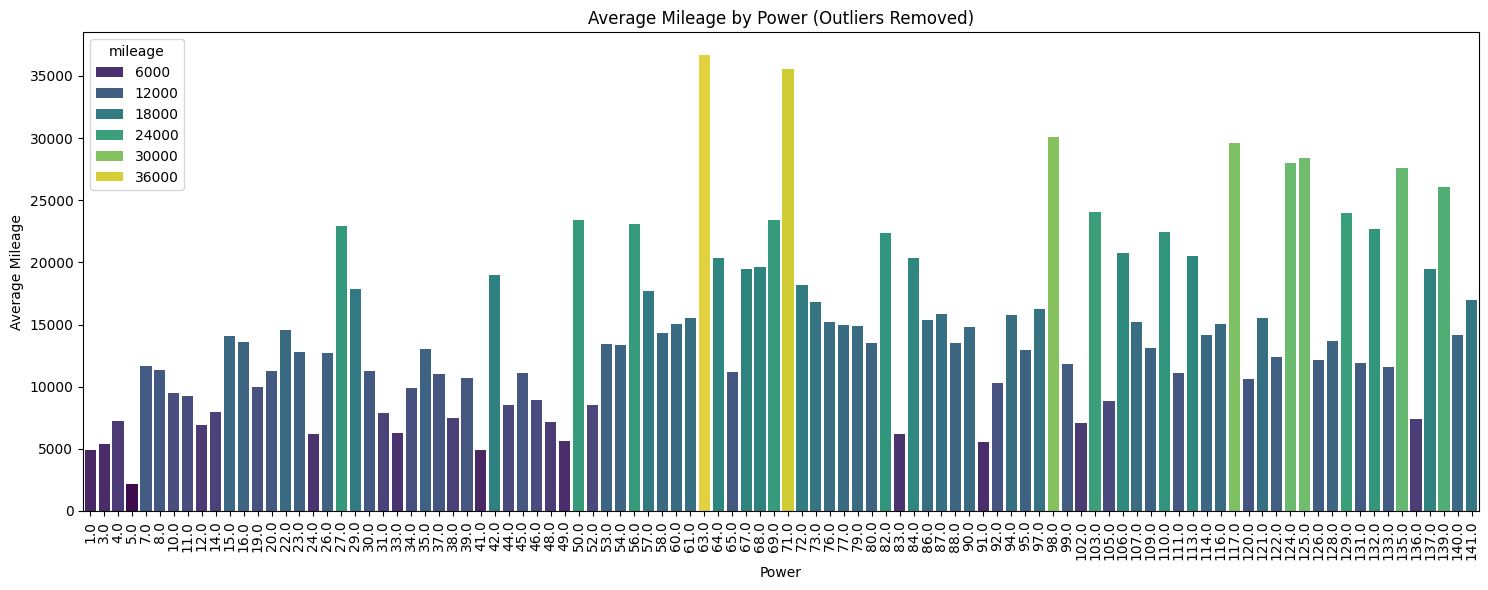

In [21]:
pow_mil = data.groupby('power')['mileage'].mean().reset_index()

# Calculate IQR for 'mileage' column
Q1 = pow_mil['mileage'].quantile(0.25)
Q3 = pow_mil['mileage'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for removing outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with mileage outside the IQR bounds
pow_mil_no_outliers = pow_mil[(pow_mil['mileage'] >= lower_bound) & (pow_mil['mileage'] <= upper_bound)]
# Create the bar plot
plt.figure(figsize=(15, 6))

sns.barplot(x='power', y='mileage', data=pow_mil_no_outliers.head(100), hue='mileage', palette='viridis')

# Titles and labels
plt.title('Average Mileage by Power (Outliers Removed)')
plt.xlabel('Power')
plt.ylabel('Average Mileage')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **REPORT:-**
##### The lack of a consistent trend suggests that factors other than power, such as vehicle type, usage purpose, or efficiency improvements, influence mileage. The peaks around 24.0 and 63.0 in power may suggest that vehicles with these power levels achieve high usage or efficiency.
##### In conclusion, this chart reveals a complex relationship between vehicle power and mileage, with some power bands achieving particularly high average mileages.

## 3. How has the average price of bikes changed over time (based on the date field)?

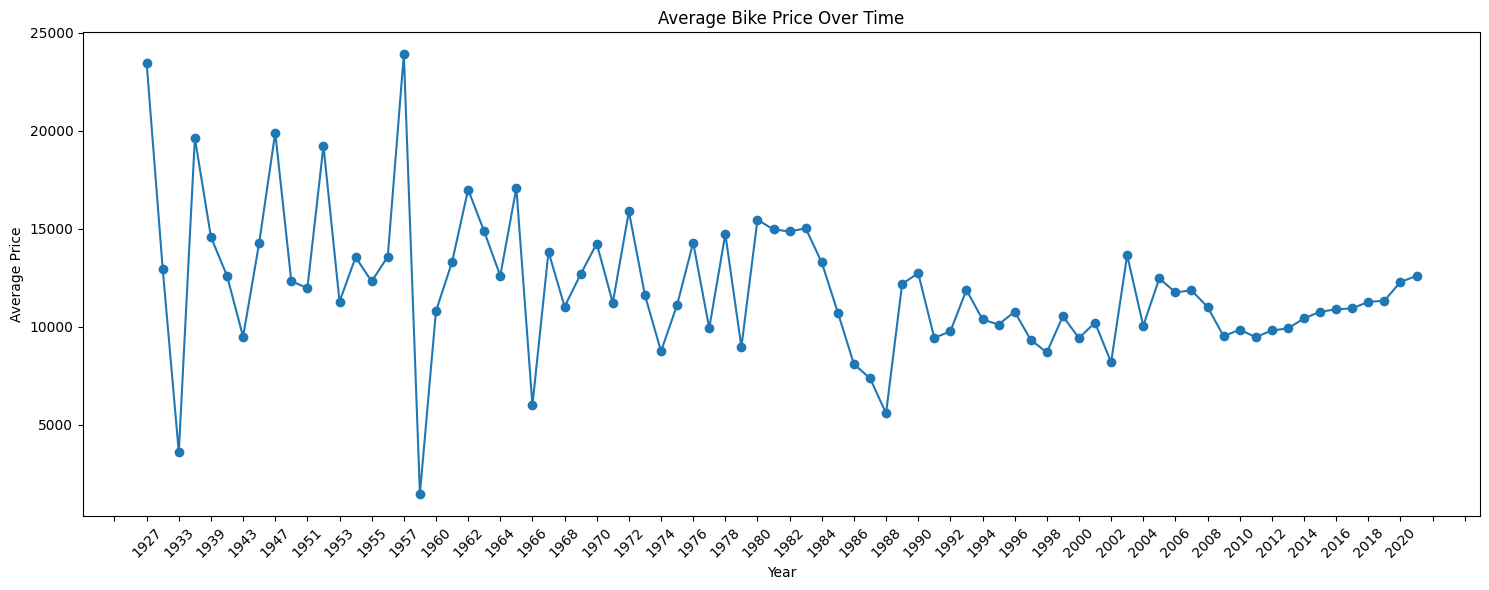

In [ ]:
# Extract the year directly from the Period type column
data['year'] = data['date'].dt.year
data = data[data['year'] > 0]

# Calculate the IQR to identify outliers in the price column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Remove outliers based on the IQR range
data_no_outliers = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Step 3: Group by 'year' and calculate the average price without outliers
average_price_per_year = data_no_outliers.groupby('year')['price'].mean().reset_index()

# Step 4: Plot the result
plt.figure(figsize=(15, 6))
plt.plot(average_price_per_year['year'].astype(str), average_price_per_year['price'], marker='o')
plt.title('Average Bike Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Set x-axis ticks in multiples of 2
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

##### **REPORT:-**
##### The graph clearly shows distinct periods of price behavior in the bike market. The early years (1927–1957) were marked by high volatility, potentially reflecting macroeconomic conditions. From the mid-1960s onward, prices became more stable, with noticeable declines in the 1980s and a slow recovery in the early 2000s. Recent years suggest gradual increases, which could be related to rising production costs, innovations in design, and higher demand for more advanced bike models.

## 4. What is the price difference between new, used, Pre-registered, Antique/Classic and demonstration bikes?

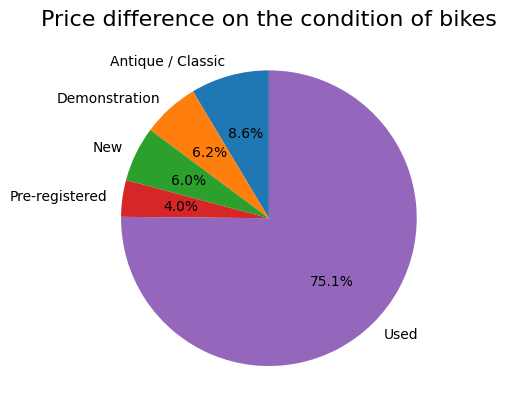

,offer_type,price
0,Antique / Classic,19903.564356
1,Demonstration,14416.810591
2,New,13982.992000
3,Pre-registered,9271.812500
4,Used,174092.758807


In [ ]:
# Using groupby to find the average price of the offer_type
avg_price_offer_type = data.groupby('offer_type')['price'].mean().reset_index()

# Plot the data
plt.pie(avg_price_offer_type['price'], labels=avg_price_offer_type['offer_type'], autopct='%1.1f%%', startangle=90)
plt.axis('off')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title('Price difference on the condition of bikes', fontsize=16)
plt.show()

# Exact price difference
avg_price_offer_type

##### **REPORT:-**
##### This analysis shows significant price variation across different bike sale types, with ***used bikes having the highest average price due to the presence of high-end or rare models***. While antique/classic bikes hold niche value, their lower average price suggests they are less likely to be high-end collectibles or could be priced affordably to appeal to hobbyists and collectors. 
##### New bikes tend to have a standardized pricing structure, depending on make, model, and market demand. They are generally more affordable than high-value used models but more expensive than pre-registered or demonstration bikes. In contrast, pre-registered and demonstration bikes offer more affordable alternatives to new bikes, making them appealing options for cost-conscious buyers

## 5. Which year has producted most number of different models?

Most number of unique models was produced in 2020 with 247 models.


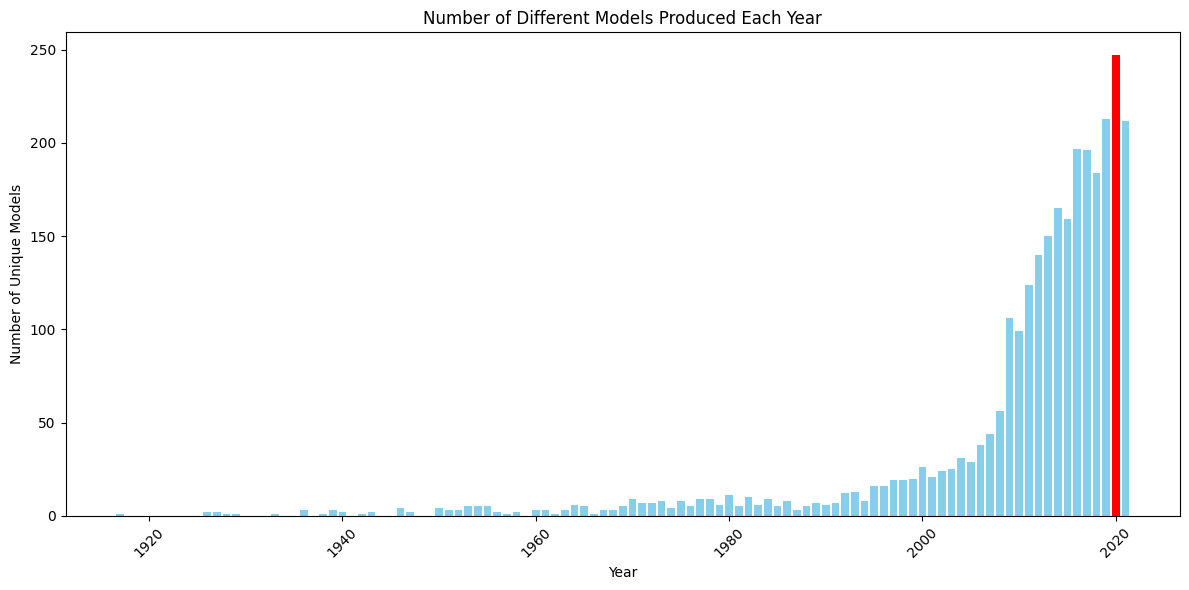

In [ ]:
uni_model_per_year = data.groupby('year')['make_model'].nunique().reset_index()
# Identify the year with the maximum number of unique models
max_model = uni_model_per_year['make_model'].max()
max_model_year = uni_model_per_year.loc[uni_model_per_year['make_model'].idxmax()]
max_year = max_model_year['year']
print(f"Most number of unique models was produced in {max_year} with {max_model} models.")
# Create the histogram plot
plt.figure(figsize=(12, 6))
colors = ['red' if year == max_year else 'skyblue' for year in uni_model_per_year['year']]
plt.bar(uni_model_per_year['year'], uni_model_per_year['make_model'], color=colors)
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")
plt.title("Number of Different Models Produced Each Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **REPORT:-**
##### From the early 20th century up to around the 1990s, the number of unique models produced each year remained relatively low, with small fluctuations. Starting in the early 2000s, there is a noticeable upward trend in the number of unique models produced annually. This rapid increase likely reflects a surge in consumer demand for specialized and varied bike models, perhaps driven by technological advancements, increased popularity of cycling, or expanded global markets.
##### ***The year 2020 stands out as the peak, with the highest number of unique models produced, indicated by a red bar.*** This peak suggests that 2020 saw an exceptional number of new bike models, possibly influenced by the global surge in cycling interest during the COVID-19 pandemic as people sought outdoor and socially distanced modes of exercise and transportation.
##### There is a slight drop in 2021 after the 2020 peak, indicating that production may have slowed down slightly, potentially due to supply chain challenges or market stabilization following the pandemic surge.

## 6. What is the distribution of fuel types among the bikes?

In [ ]:
# Create a DataFrame for fuel count
fuel_cnt = pd.DataFrame(data['fuel'].value_counts())

# Calculate the percentage
fuel_cnt['percentage'] = (fuel_cnt['count'] / data['fuel'].count()) * 100

fuel_cnt

,count,percentage
fuel,,
Gasoline,6897,96.718553
Electric,110,1.542561
Two Stroke Gasoline,57,0.799327
Others,57,0.799327
Diesel,7,0.098163
Electric/Gasoline,3,0.042070


##### **REPORT:-**
##### ***The overwhelming dominance of gasoline engines (96.7%) highlights a market that heavily favors traditional internal combustion engines for motorcycles.*** Alternative fuel types, while present, remain a very small segment, with electric bikes being the most popular among them. The shift to alternative and more sustainable fuel sources, such as electric, is evident but in its early stages, reflecting trends seen globally in the automotive industry. Diesel and hybrid options are nearly non-existent in the dataset, showing that these technologies have yet to gain traction in the bike market.

## 7. How does the price vary based on the type of gear (manual/automatic/semi-automatic)?

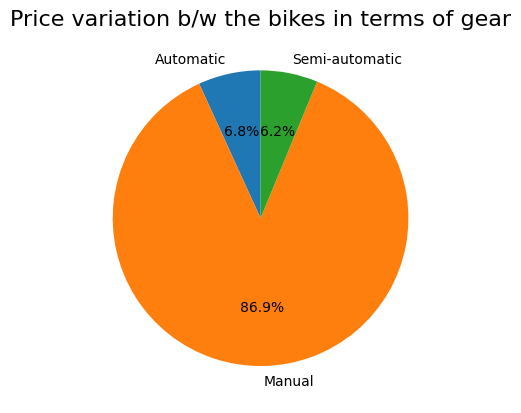

,gear,price
0,Automatic,14693.454623
1,Manual,187361.259068
2,Semi-automatic,13461.630137


In [ ]:
# Using groupby to find the average price variations between the type of gear
avg_price_gear = data.groupby('gear')['price'].mean().reset_index()

# Plot the data
plt.pie(avg_price_gear['price'], labels=avg_price_gear['gear'], autopct='%1.1f%%', startangle=90)
plt.axis('off')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title('Price variation b/w the bikes in terms of gear', fontsize=16)
plt.show()

# Exact price difference
avg_price_gear

##### **REPORT:-**
##### The data shows that manual bikes overwhelmingly dominate the market in terms of price distribution, while automatic and semi-automatic bikes share a much smaller proportion. This could be reflective of general consumer preferences, market availability, or pricing trends across different types of gear systems.

## 8. Are newer bike models priced significantly higher compared to older models?

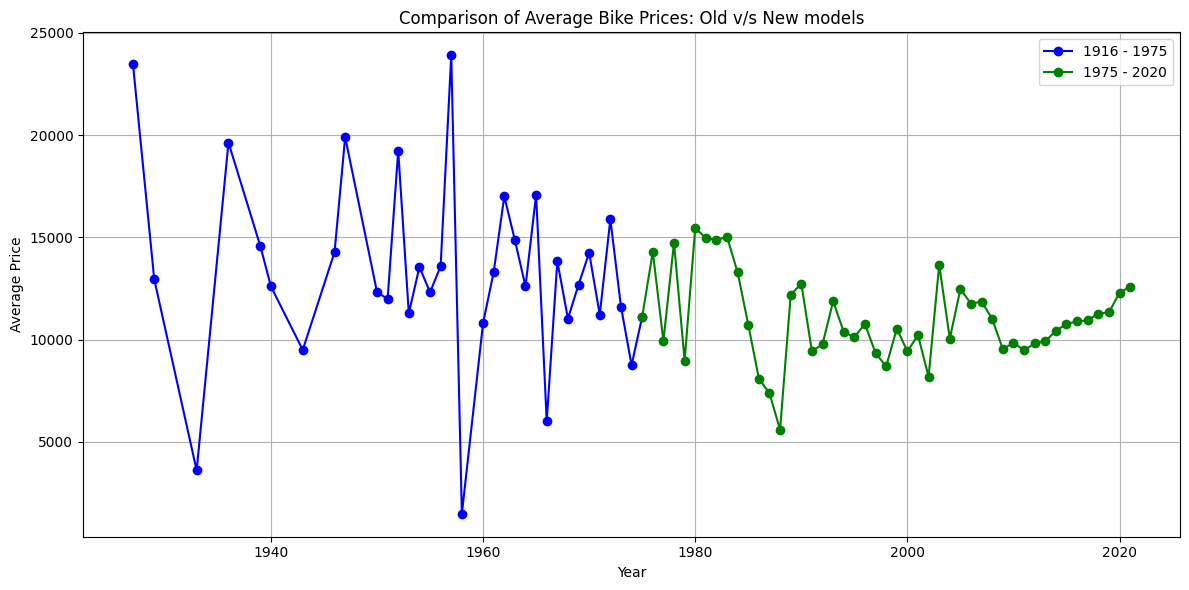

In [ ]:
# Filter the data for the old (1916-1975) and new (1975-2023)
# 'data_no_outliers' it is the price data that has no outliers 
date_old = data_no_outliers[(data_no_outliers['year'] >= 1916) & (data_no_outliers['year'] <= 1975)]
date_new = data_no_outliers[(data_no_outliers['year'] >= 1975) & (data_no_outliers['year'] <= 2023)]

# Group by 'year' and calculate the average price for both decades
avg_price_old = date_old.groupby('year')['price'].mean().reset_index()
avg_price_new = date_new.groupby('year')['price'].mean().reset_index()

# Plot the average prices for both decades
plt.figure(figsize=(12, 6))

# Plot for 1990s
plt.plot(avg_price_old['year'], avg_price_old['price'], marker='o', label='1916 - 1975', color='blue')

# Plot for 2020s
plt.plot(avg_price_new['year'], avg_price_new['price'], marker='o', label='1975 - 2020', color='green')

# Titles and labels
plt.title('Comparison of Average Bike Prices: Old v/s New models')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


##### **REPORT:-**
##### ***Older Models (1916-1975)***: This period saw substantial volatility in prices, with several extreme price peaks, followed by sharp drops.
##### ***Newer Models (1975-2020)***: While still displaying some fluctuation, prices for newer models are far more stable, especially after 2000, where a steady rise in average prices is visible.
##### The stabilization and increase in newer model prices reflect a **more mature and stable bike market**, likely driven by improvements in technology, production consistency, and consumer expectations.

## 9. Is there a relation between the milage and the gear transmition?

C:\Users\donsh\AppData\Local\Temp\ipykernel_13600\2111902780.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(x=mile_gear['gear'], y=mile_gear['mileage'], palette=sns.color_palette('deep'), hue=mile_gear['gear'])


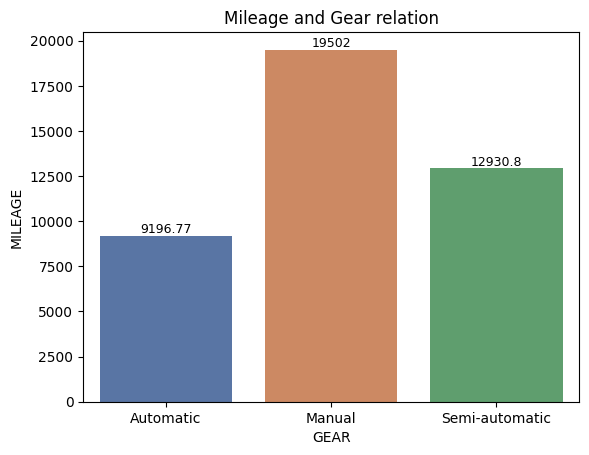

In [ ]:
# Mileage and gear relation
mile_gear = data.groupby('gear')['mileage'].mean().reset_index()

# Plotting the relation
ax = sns.barplot(x=mile_gear['gear'], y=mile_gear['mileage'], palette=sns.color_palette('deep'), hue=mile_gear['gear'])

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
    
# Adding label
plt.xlabel('GEAR')
plt.ylabel('MILEAGE')
plt.title('Mileage and Gear relation')
plt.show()

##### **REPORT:-**
##### This suggests that, on average, manual vehicles tend to be more fuel-efficient than both automatic and semi-automatic vehicles, with automatic vehicles being the least fuel-efficient among the three.

## 10. Top 10 highest power delivering bikes?

C:\Users\donsh\AppData\Local\Temp\ipykernel_13600\1726976273.py:9: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=top_10['power'], y=top_10['make_model'], palette=sns.color_palette("viridis"), hue=top_10['make_model'])


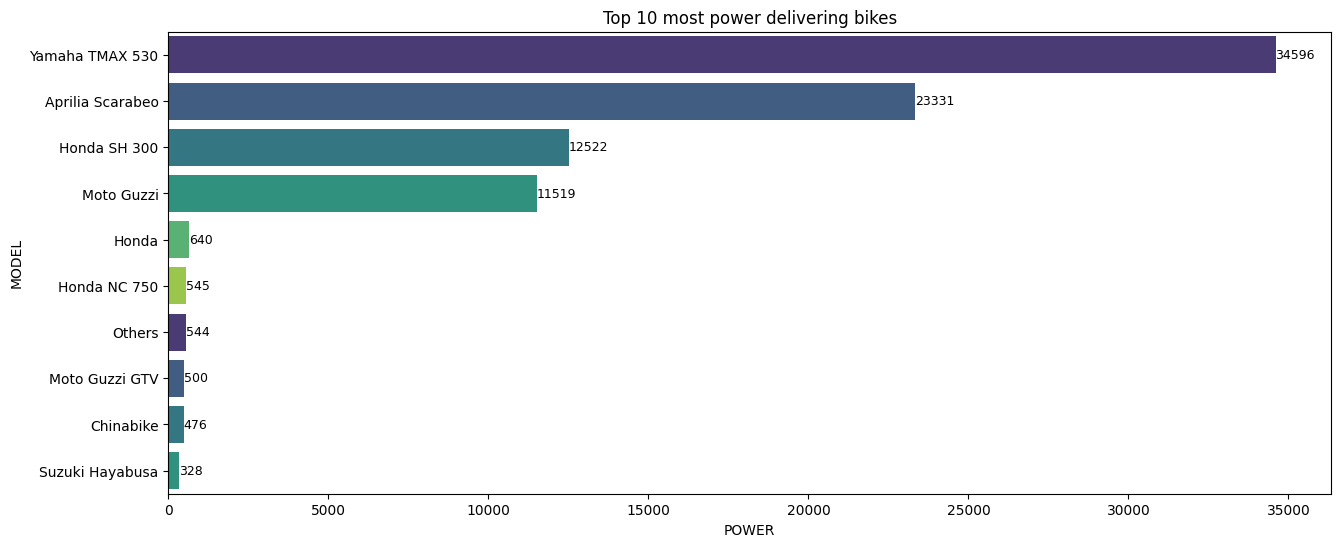

,make_model,power
923,Yamaha TMAX 530,34596.0
28,Aprilia Scarabeo,23331.0
387,Honda SH 300,12522.0
605,Moto Guzzi,11519.0
330,Honda,640.0
379,Honda NC 750,545.0
650,Others,544.0
620,Moto Guzzi GTV,500.0
183,Chinabike,476.0
785,Suzuki Hayabusa,328.0


In [ ]:
# Use groupby to find the max price and the corresponding model column 
max_price_model = data.groupby('make_model')['power'].max().reset_index()

# Sort the top 10 models showing high price
top_10 = max_price_model.sort_values(by='power', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10['power'], y=top_10['make_model'], palette=sns.color_palette("viridis"), hue=top_10['make_model'])

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# Adding labels and titles
plt.xlabel('POWER')
plt.ylabel('MODEL')
plt.title('Top 10 most power delivering bikes')
# Display
plt.show()
top_10


##### **REPORT:-**
##### The chart highlights a clear distinction between high-power bikes and those with moderate to low power outputs. ***Yamaha TMAX 530 is the standout model in terms of power***, followed by ***Aprilia Scarabeo and Honda SH 300***, with these three models leading by a large margin. The other models deliver considerably less power, indicating a significant performance gap between the top contenders and the rest of the list.

# **CONCLUSION**
##### The analysis of the European motorbike market dataset reveals important insights into sales trends, market segments, and motorbike characteristics. Key steps in the process included data exploration, cleaning, and in-depth examination of features such as price, mileage, and power, which provide a foundation for understanding market dynamics. The dataset, reduced to 7,155 unique entries after removing duplicates and handling missing values, was used to explore various patterns and relationships within the motorbike industry.

##### Ultimately, the analysis offers valuable insights for stakeholders to better understand demand drivers and segment-specific preferences, potentially guiding future business decisions and market strategies within the European motorbike industry.